# Sales Performance EDA & Root Cause Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("retail_sales_clean.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Order ID,Date,Customer Segment,Region,City,Category,Sub-Category,Product Name,Units Sold,Unit Price,Revenue,Cost,Profit,Shipping Cost,Discount,Delivery Status
0,ORD-1000,2023-04-13,Small Business,South,City_22,Technology,Phones,Phones - 230,7,228.46,1599.22,855.54,743.68,13.34,0.0,On Time
1,ORD-1001,2023-11-05,Corporate,South,City_28,Office Supplies,Paper,Paper - 781,1,159.08,159.08,108.76,50.32,12.28,0.0,On Time
2,ORD-1002,2023-07-09,Corporate,East,City_9,Technology,Copiers,Copiers - 113,3,431.37,1294.11,955.20,338.91,5.33,0.0,Late
3,ORD-1003,2023-12-12,Small Business,East,City_42,Technology,Phones,Phones - 489,8,26.85,214.80,175.76,39.04,21.56,0.0,On Time
4,ORD-1004,2024-04-21,Corporate,South,City_21,Office Supplies,Paper,Paper - 395,4,302.97,1211.88,996.96,214.92,9.90,0.0,On Time


## Basic Checks

In [3]:
df.shape
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          1500 non-null   object        
 1   Date              1500 non-null   datetime64[ns]
 2   Customer Segment  1500 non-null   object        
 3   Region            1500 non-null   object        
 4   City              1500 non-null   object        
 5   Category          1500 non-null   object        
 6   Sub-Category      1500 non-null   object        
 7   Product Name      1500 non-null   object        
 8   Units Sold        1500 non-null   int64         
 9   Unit Price        1500 non-null   float64       
 10  Revenue           1500 non-null   float64       
 11  Cost              1500 non-null   float64       
 12  Profit            1500 non-null   float64       
 13  Shipping Cost     1500 non-null   float64       
 14  Discount          1500 n

np.int64(0)

## Univariate Analysis

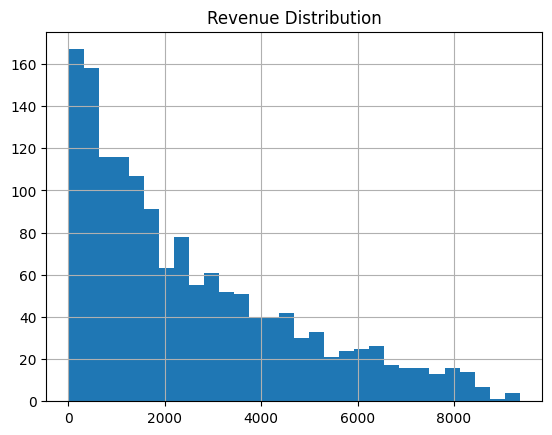

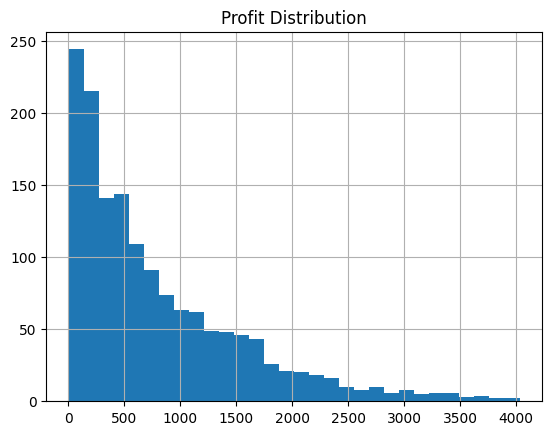

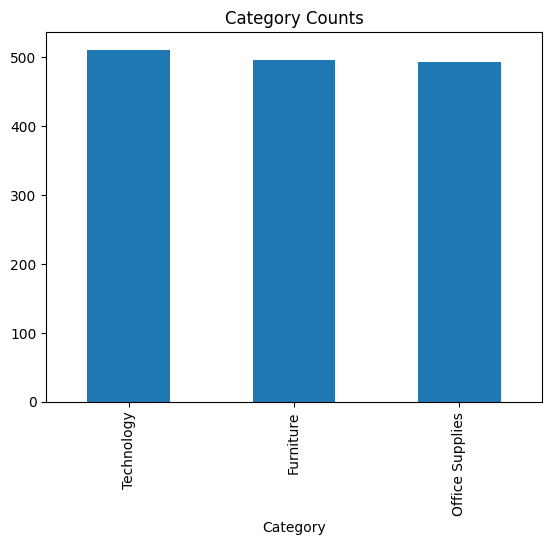

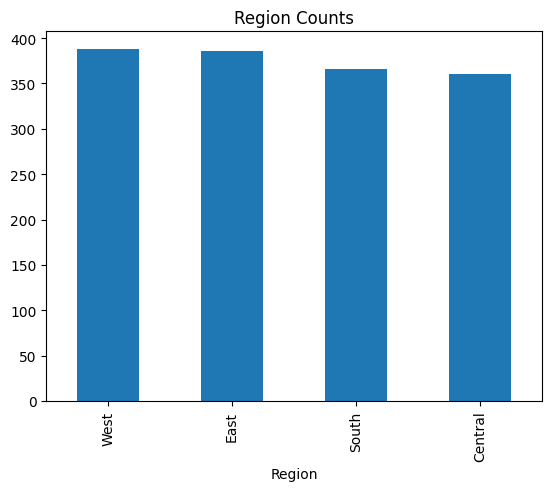

In [4]:
df['Revenue'].hist(bins=30)
plt.title('Revenue Distribution')
plt.show()

df['Profit'].hist(bins=30)
plt.title('Profit Distribution')
plt.show()

df['Category'].value_counts().plot(kind='bar', title='Category Counts')
plt.show()

df['Region'].value_counts().plot(kind='bar', title='Region Counts')
plt.show()

## Monthly Revenue & Profit Trend

C:\Users\appua\AppData\Local\Temp\ipykernel_7476\1334150263.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = numeric_df.resample('M').sum()


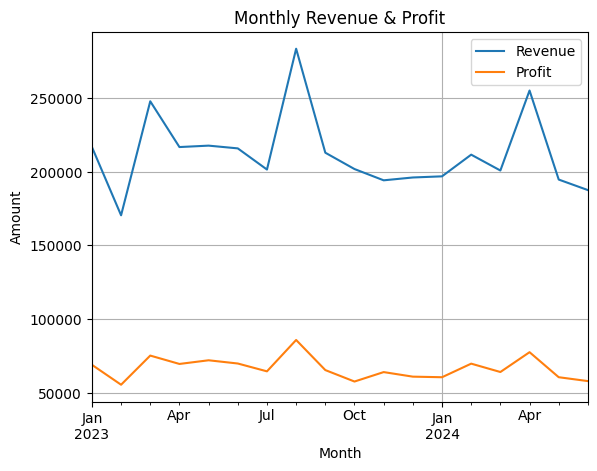

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
numeric_df = df.select_dtypes(include=['number'])
monthly = numeric_df.resample('M').sum()
monthly[['Revenue', 'Profit']].plot(title='Monthly Revenue & Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

## Discount Impact on Profit

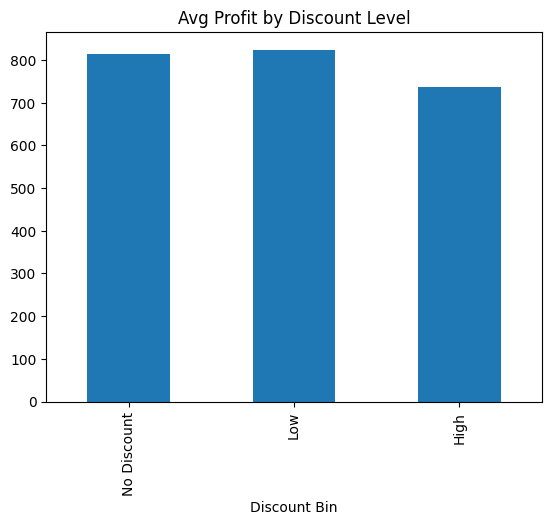

C:\Users\appua\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


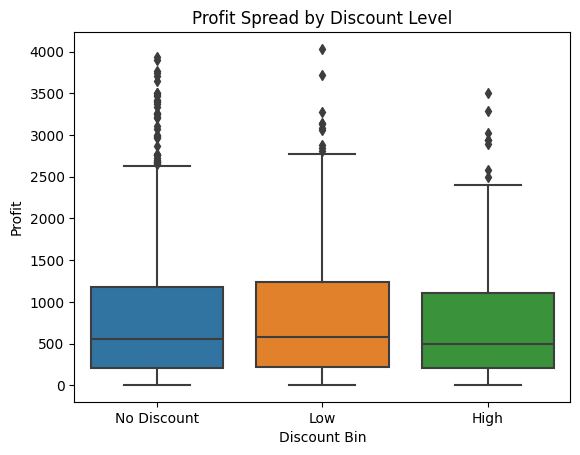

In [6]:
df['Discount Bin'] = pd.cut(df['Discount'], bins=[-0.01, 0.01, 0.15, 0.3], labels=['No Discount', 'Low', 'High'])

df.groupby('Discount Bin', observed=True)['Profit'].mean().plot(kind='bar', title='Avg Profit by Discount Level')
plt.show()

sns.boxplot(x='Discount Bin', y='Profit', data=df)
plt.title('Profit Spread by Discount Level')
plt.show()

## Regional Profitability

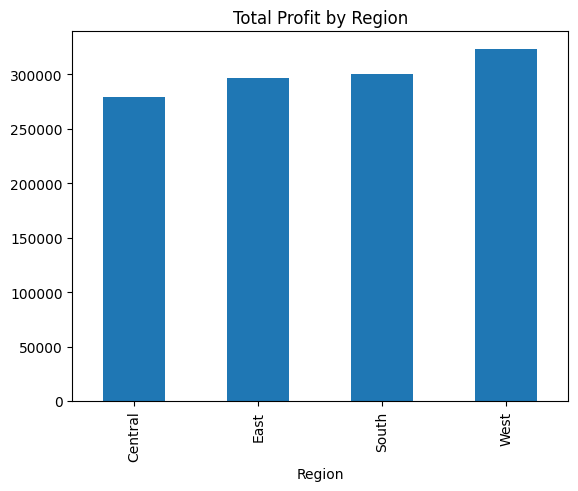

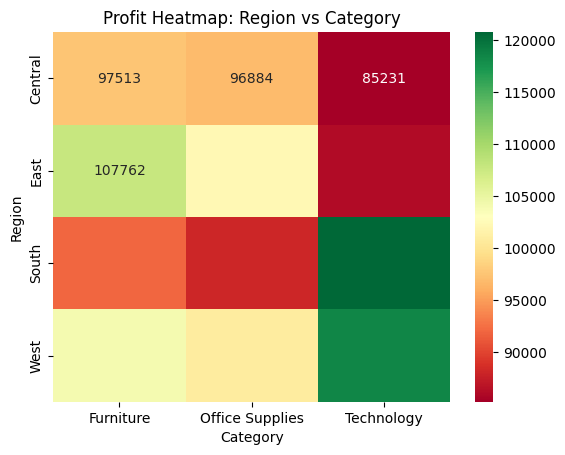

In [7]:
df.groupby('Region')['Profit'].sum().plot(kind='bar', title='Total Profit by Region')
plt.show()

pivot = pd.pivot_table(df, values='Profit', index='Region', columns='Category', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn')
plt.title('Profit Heatmap: Region vs Category')
plt.show()

## South Region Profit Trend After Q2 2024

C:\Users\appua\AppData\Local\Temp\ipykernel_7476\2852266471.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  south_monthly = south_df.set_index('Date').resample('M').sum()


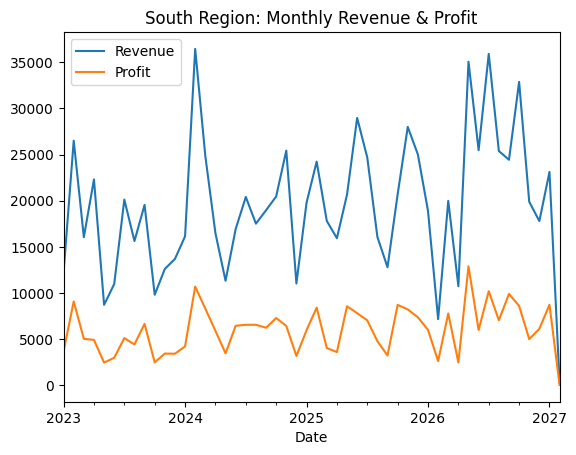

In [31]:
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
south_df = df[df['Region'] == 'South']
south_monthly = south_df.set_index('Date').resample('M').sum()
south_monthly[['Revenue', 'Profit']].plot(title='South Region: Monthly Revenue & Profit')
plt.show()

## Delivery Performance by Region

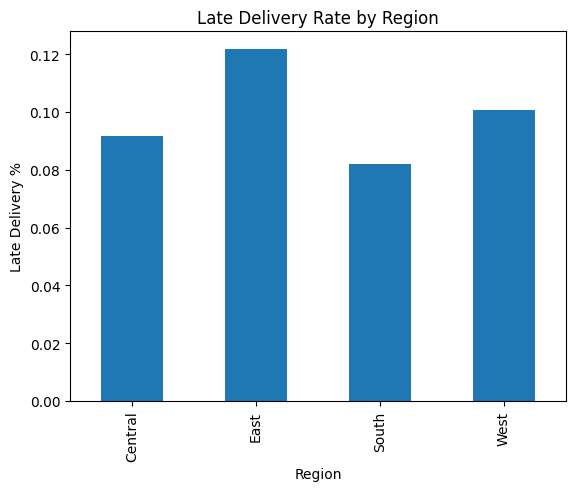

In [32]:
late_df = df[df['Delivery Status'] == 'Late']
late_ratio = late_df['Region'].value_counts() / df['Region'].value_counts()
late_ratio.plot(kind='bar', title='Late Delivery Rate by Region')
plt.ylabel('Late Delivery %')
plt.show()

C:\Users\appua\AppData\Local\Temp\ipykernel_7476\2166020832.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  south_monthly = south_df.resample('M').sum()


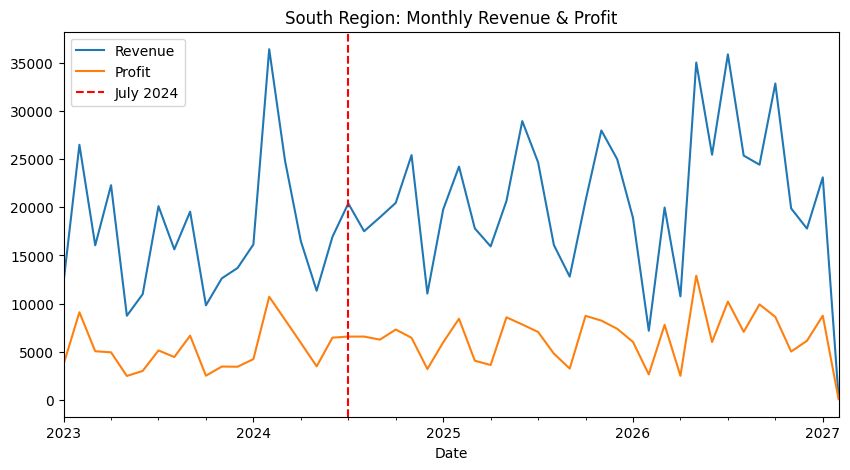

In [33]:
south_df = df[df['Region'] == 'South']
south_df = south_df.set_index('Date').sort_index()

south_monthly = south_df.resample('M').sum()

south_monthly[['Revenue', 'Profit']].plot(title='South Region: Monthly Revenue & Profit', figsize=(10, 5))
plt.axvline(pd.to_datetime('2024-07-01'), color='red', linestyle='--', label='July 2024')
plt.legend()
plt.show()

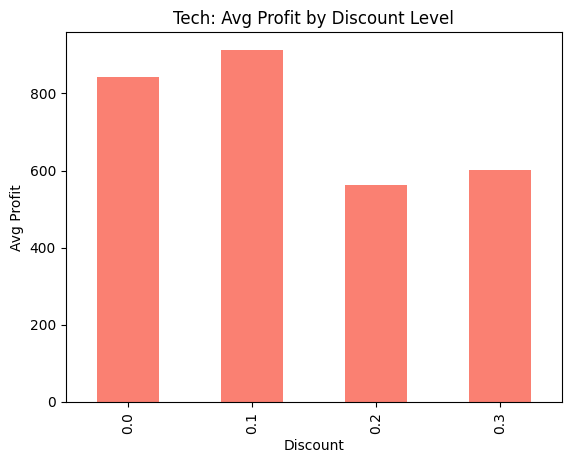

In [35]:
tech_df = df[df['Category'] == 'Technology']
tech_discount_impact = tech_df.groupby('Discount')['Profit'].mean()

tech_discount_impact.plot(kind='bar', title='Tech: Avg Profit by Discount Level', color='salmon')
plt.ylabel('Avg Profit')
plt.show()

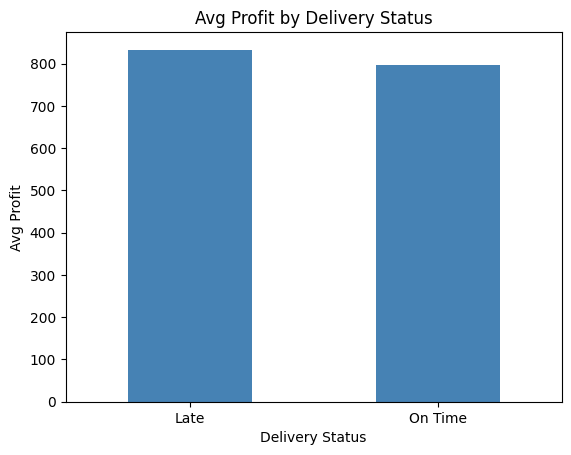

In [36]:
delivery_impact = df.groupby('Delivery Status')['Profit'].mean()

delivery_impact.plot(kind='bar', title='Avg Profit by Delivery Status', color='steelblue')
plt.ylabel('Avg Profit')
plt.xticks(rotation=0)
plt.show()

In [39]:
south_late = df[(df['Region'] == 'South') & (df['Delivery Status'] == 'Late')]
print(south_late[['Revenue', 'Profit']].describe())

df[(df['Category'] == 'Technology') & (df['Discount'] == '30%+') & (df['Delivery Status'] == 'Late')][['Profit']].describe()

           Revenue       Profit
count    30.000000    30.000000
mean   2842.923333   978.153533
std    2209.117628   903.318436
min      28.410000     5.586000
25%     925.180000   258.135000
50%    2242.140000   577.125000
75%    4299.135000  1486.140000
max    7890.300000  3217.680000


,Profit
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN
